In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

palette = sns.color_palette("GnBu_r", 9)

# Testing Benford's Law

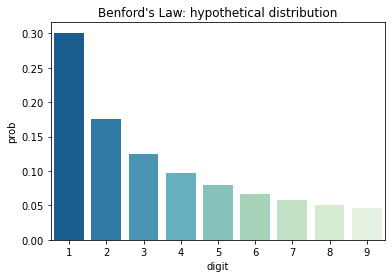

In [2]:
#P(n)=log10(1+1/n)

benford_proba = ({'digit': i, 'prob': np.log10(1+1/i)} for i in range(1,10,1))
ideal_df = pd.DataFrame(benford_proba)
sns.barplot(x='digit', y='prob', data=ideal_df, palette=palette).set_title('Benford\'s Law: hypothetical distribution')
plt.show()

In [7]:
def plot_benford(x, y, data, title):
    fig, ax = plt.subplots()
    sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax, zorder=0).set_title(title)
    sns.pointplot(x='digit', y='prob', data=ideal_df, ax=ax, zorder=1, join=False, color='gray')
    ax.set(xlabel='First Digit', ylabel='Frequency')
    return fig, ax 

# Belgian City Populations

The first thing we'll check is the poputation of Belgian cities. As only the top 400 is listed we'll scale the data down so the smallest city has one inhabitant.

In [4]:
df = pd.read_table('./data/belgian_cities_population.csv', sep=',')
df['scaled_pop'] = df['pop'] - np.min(df['pop']) + 1 # scale data so smallest value is 1
df['first_digit'] = [str(n)[0] for n in df['scaled_pop']]
counts_cities_df = df.groupby('first_digit').agg(
    count = pd.NamedAgg('name', 'count')
).reset_index()

counts_cities_df['count'] /= np.sum(counts_cities_df['count']) # normalize values to compare with ideal case

counts_cities_df

,first_digit,count
0,1,0.3275
1,2,0.1875
2,3,0.0950
3,4,0.0875
4,5,0.0650
5,6,0.0850
6,7,0.0675
7,8,0.0425
8,9,0.0425


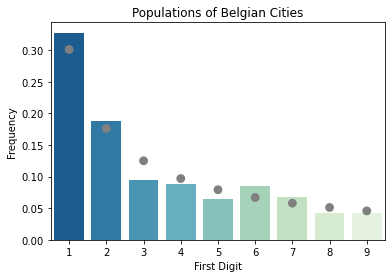

In [8]:
fig, ax = plot_benford('first_digit', 'count', counts_cities_df, "Populations of Belgian Cities")

# Gwent Pro-Rank MMR scores

Let's check if Benford's law applies to Gwent MMR scores from last season. As the scores start at 9600 for players that completed their placements (25 games with four factions) and only the top 2860 players are included we'll scale the scores so the lowest score is 1.

In [9]:
df = pd.read_excel('./data/season_of_the_draconid_2020.xlsx').drop(columns='Unnamed: 0')
df['scaled_mmr'] = df['mmr']-np.min(df['mmr'])+1
df['first_digit'] = [str(n)[0] for n in df['scaled_mmr']]
counts_gwent_df = df.groupby('first_digit').agg(
    count = pd.NamedAgg('name', 'count')
).reset_index()

counts_gwent_df['count'] /= np.sum(counts_gwent_df['count']) # normalize values to compare with ideal case

counts_gwent_df


,first_digit,count
0,1,0.306294
1,2,0.190210
2,3,0.139161
3,4,0.088112
4,5,0.073776
5,6,0.067483
6,7,0.046154
7,8,0.043706
8,9,0.045105


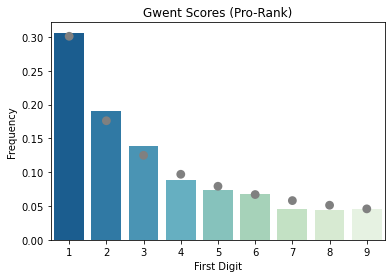

In [10]:
fig, ax = plot_benford('first_digit', 'count', counts_gwent_df, "Gwent Scores (Pro-Rank)")

# Altitude of the World's Capitals

We can check if the law holds true for the altitude of different capitals in the world. Data from Wikipedia, we'll filter all captials which are at sea level as 0 is not a number we can consider for this.

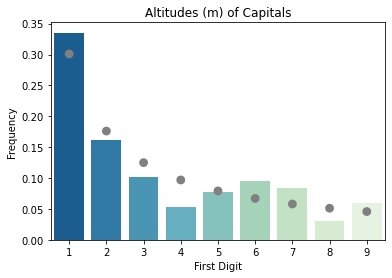

In [16]:
df = pd.read_excel('./data/capitals_altitude.xlsx')
df = df[df['Elevation (m)'] > 0]

df['first_digit_m'] = [str(n)[0] for n in df['Elevation (m)']]
df['first_digit_ft'] = [str(n)[0] for n in df['Elevation (ft)']]
                        
counts_altitude_df = df.groupby('first_digit_m').agg(
    count = pd.NamedAgg('Country', 'count'),
).reset_index()

counts_altitude_df['count'] /= np.sum(counts_altitude_df['count']) # normalize values to compare with ideal case

fig, ax = plot_benford('first_digit_m', 'count', counts_altitude_df, "Altitudes (m) of Capitals")

# Bacteria in the human gut


In [12]:
# Original file: http://downloads.hmpdacc.org/data/HMQCP/otu_table_psn_v35.txt.gz
# Header was removed and recompressed
df = pd.read_table('./data/v35_psn_otu.genus.fixed.txt.gz', compression='gzip')

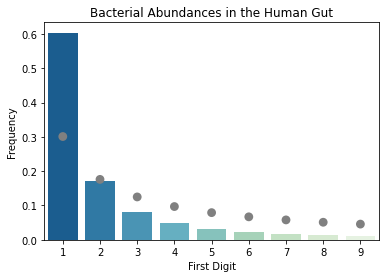

In [13]:
first_digits = (str(x)[0] for x in df.drop(columns=["#OTU ID", "Consensus Lineage"]).values.flatten() if float(x) > 0)
c = Counter(first_digits)
counts_microbiome_df = pd.DataFrame([(k,v) for k,v in c.items()])
counts_microbiome_df.columns = ['first_digit', 'count']

counts_microbiome_df['count'] /= np.sum(counts_microbiome_df['count']) # normalize values to compare with ideal case

fig, ax = plot_benford('first_digit', 'count', counts_microbiome_df, "Bacterial Abundances in the Human Gut")

# COVID-19 infections in Belgium

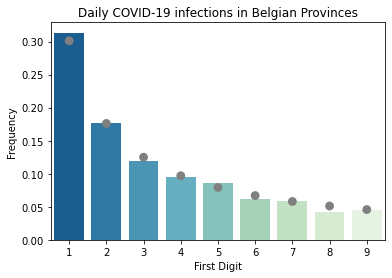

In [15]:
df = pd.read_csv('./data/COVID19BE_CASES_AGESEX.csv').dropna()

grouped_df = df.groupby(['DATE', 'PROVINCE']).agg(
    count = pd.NamedAgg('CASES', 'sum')
).reset_index()

grouped_df['first_digit'] = [str(n)[0] for n in grouped_df['count']]

counts_covid_df = grouped_df.groupby('first_digit').agg(
    count = pd.NamedAgg('first_digit', 'count')
).reset_index()

counts_covid_df['count'] /= np.sum(counts_covid_df['count']) # normalize values to compare with ideal case

fig, ax = plot_benford('first_digit', 'count', counts_covid_df, "Daily COVID-19 infections in Belgian Provinces")